<a href="https://colab.research.google.com/github/eschmidt39/Schmidt_Black_Bear_Hibernations/blob/main/Schmidt_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
fname = '/content/drive/MyDrive/FWE458 - Envir. Data Sci./Project/Johnson_et_al_2017_BlackBearHibernation_SupplData.csv'
df=pd.read_csv(fname)
print(df)

        den_id bear_id  entry  duration   exit  age        mass  offspring  \
0    B125_2013    B125  264.0     228.0  126.0   17  156.254296     barren   
1    B125_2014    B125  285.0     187.0  107.0   18  140.193720     barren   
2    B125_2016    B125  276.0       NaN    NaN   20  118.527712     barren   
3    B126_2015    B126  315.0     131.0   81.0    4   64.057448     barren   
4    B126_2016    B126  319.0       NaN    NaN    5   98.261704     barren   
..         ...     ...    ...       ...    ...  ...         ...        ...   
126   B50_2013     B50  280.0     171.0   85.0   12         NaN  yearlings   
127   B52_2015     B52  316.0     141.0   92.0    7  108.234896  yearlings   
128   B55_2016     B55  327.0     112.0   74.0    7   99.879952  yearlings   
129   B57_2016     B57  334.0     125.0   94.0    7   77.093944  yearlings   
130    B7_2016      B7  336.0       NaN    NaN    8         NaN  yearlings   

     fall_mintemp  winter_mintemp  spring_mintemp  fall_precip 

In [40]:
#create field for year that the hibernation took place
df['year'] = df['den_id'].str[-4:]
df

,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation,year
0,B125_2013,B125,264.0,228.0,126.0,17,156.254296,barren,1.536440,-7.920372,-6.340974,30.301152,190.875000,158.347826,46.833199,6.637359,2281.120117,2013
1,B125_2014,B125,285.0,187.0,107.0,18,140.193720,barren,0.506958,-6.582209,-3.814811,127.132526,21.797101,0.000000,27.993601,18.512523,2149.020020,2014
2,B125_2016,B125,276.0,NaN,NaN,20,118.527712,barren,3.288152,NaN,NaN,125.974419,211.431655,8.085106,40.787602,13.502162,2285.090088,2016
3,B126_2015,B126,315.0,131.0,81.0,4,64.057448,barren,2.879919,-6.014587,-4.395311,166.147622,56.702899,90.804348,14.354700,18.577468,2393.649902,2015
4,B126_2016,B126,319.0,NaN,NaN,5,98.261704,barren,3.521840,NaN,NaN,131.827007,151.798561,3.936170,14.015000,18.588787,2290.870117,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,B50_2013,B50,280.0,171.0,85.0,12,NaN,yearlings,1.687521,-7.894938,-6.567567,33.923437,271.750000,304.391304,8.517380,5.773077,2502.010010,2013
127,B52_2015,B52,316.0,141.0,92.0,7,108.234896,yearlings,3.404437,-5.369078,-3.248659,148.508204,55.275362,99.847826,17.525000,19.232790,2337.469971,2015
128,B55_2016,B55,327.0,112.0,74.0,7,99.879952,yearlings,3.521462,NaN,NaN,143.534414,248.266187,52.446809,28.036800,16.398807,2672.010010,2016
129,B57_2016,B57,334.0,125.0,94.0,7,77.093944,yearlings,3.444209,NaN,NaN,128.684873,229.906475,13.914894,18.955999,13.969835,2379.770020,2016


In [41]:
#remove NaN for only the target fields (don't want to lose any more data that necessary)
df_clean = df.dropna(subset = ['entry', 'duration', 'exit', 'fall_mintemp', 'winter_mintemp','spring_mintemp'])
df_clean

,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation,year
0,B125_2013,B125,264.0,228.0,126.0,17,156.254296,barren,1.536440,-7.920372,-6.340974,30.301152,190.875000,158.347826,46.833199,6.637359,2281.120117,2013
1,B125_2014,B125,285.0,187.0,107.0,18,140.193720,barren,0.506958,-6.582209,-3.814811,127.132526,21.797101,0.000000,27.993601,18.512523,2149.020020,2014
3,B126_2015,B126,315.0,131.0,81.0,4,64.057448,barren,2.879919,-6.014587,-4.395311,166.147622,56.702899,90.804348,14.354700,18.577468,2393.649902,2015
5,B128_2013,B128,282.0,201.0,117.0,7,NaN,barren,1.016436,-7.863387,-6.438754,51.058362,211.455882,182.217391,2.606900,5.430743,2488.800049,2013
6,B128_2014,B128,286.0,195.0,116.0,8,88.725008,barren,0.603796,-7.055041,-4.645870,128.206246,77.260870,1.086957,0.017699,25.098659,2483.320068,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,B313_2014,B313,311.0,137.0,83.0,14,85.376272,yearlings,0.806188,-6.609633,-4.345476,137.156850,58.702899,0.000000,23.078501,15.811865,2375.320068,2014
120,B393_2015,B393,306.0,143.0,84.0,15,95.086560,yearlings,3.630685,-4.617094,-2.634485,113.136465,25.275362,47.804348,13.272100,13.886434,2199.239990,2015
122,B47_2013,B47,304.0,170.0,108.0,7,83.113744,yearlings,1.352063,-8.776822,-6.735741,30.008086,148.764706,98.130435,8.211420,11.092715,2237.290039,2013
126,B50_2013,B50,280.0,171.0,85.0,12,NaN,yearlings,1.687521,-7.894938,-6.567567,33.923437,271.750000,304.391304,8.517380,5.773077,2502.010010,2013


In [42]:
df_clean.describe()

,entry,duration,exit,age,mass,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation
count,81.000000,81.000000,81.000000,81.000000,74.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,294.283951,172.580247,101.617284,9.888889,91.069032,1.583522,-6.759725,-4.902143,119.215579,165.878423,195.962740,16.478540,15.555954,2460.211617
std,14.385961,23.737557,13.251007,5.974948,21.008186,1.298122,1.350576,1.616087,52.625530,177.891466,266.829027,15.155198,7.286029,306.993332
min,264.000000,126.000000,80.000000,2.000000,46.210464,-1.491501,-9.870996,-10.017537,20.802754,13.514493,0.000000,0.000000,3.181372,1955.420044
25%,285.000000,156.000000,91.000000,5.000000,76.182486,0.556734,-7.863387,-6.306272,98.603777,55.826087,46.108696,6.146380,8.591842,2267.860107
50%,291.000000,170.000000,101.000000,8.000000,90.956660,1.410675,-6.667784,-4.416294,134.469010,91.503597,99.847826,13.272100,17.505964,2369.989990
75%,304.000000,188.000000,110.000000,12.000000,106.660146,2.964476,-5.606877,-3.597396,148.718046,211.455882,194.500000,23.395500,21.115852,2639.719971
max,323.000000,228.000000,131.000000,27.000000,156.254296,4.080327,-3.760828,-2.167965,206.920178,840.338235,1084.108696,80.738502,30.141841,3414.050049


In [43]:
df_2012 = df_clean[(df_clean['year'] == '2012')]
df_2012

,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation,year
27,B27_2012,B27,277.0,219.0,131.0,24,116.018976,barren,1.305053,-7.175923,-5.113328,135.698680,91.503597,111.404255,32.754601,12.979944,2279.260010,2012
35,B40_2012,B40,312.0,141.0,88.0,4,116.746736,barren,1.770572,-6.829364,-5.132289,134.469010,74.877698,90.659574,23.572100,15.383827,2187.709961,2012
64,B25_2012,B25,315.0,148.0,98.0,4,99.516072,cubs,1.546538,-6.525461,-5.934983,137.054057,110.964029,130.744681,5.630720,23.144404,2402.000000,2012
82,B47_2012,B47,287.0,171.0,93.0,6,81.053168,cubs,1.774497,-6.949814,-5.289308,130.640130,93.776978,136.595745,17.533600,9.896850,2187.800049,2012
86,B50_2012,B50,281.0,164.0,80.0,11,114.283056,cubs,1.631499,-6.347052,-5.653181,146.717628,293.625899,450.297872,0.361251,20.145935,2681.360107,2012
87,B52_2012,B52,315.0,159.0,109.0,4,NaN,cubs,1.645157,-5.562184,-5.088855,136.280612,123.208633,137.574468,7.243310,17.054566,2283.489990,2012
108,B18_2012,B18,291.0,171.0,97.0,8,74.254720,yearlings,0.949892,-7.920299,-6.910030,139.329870,102.071942,124.553191,2.151360,19.605362,2310.429932,2012


In [44]:
df_2013 = df_clean[(df_clean['year'] == '2013')]
df_2013

,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation,year
0,B125_2013,B125,264.0,228.0,126.0,17,156.254296,barren,1.536440,-7.920372,-6.340974,30.301152,190.875000,158.347826,46.833199,6.637359,2281.120117,2013
5,B128_2013,B128,282.0,201.0,117.0,7,NaN,barren,1.016436,-7.863387,-6.438754,51.058362,211.455882,182.217391,2.606900,5.430743,2488.800049,2013
7,B133_2013,B133,274.0,188.0,96.0,3,59.454344,barren,1.453134,-8.063325,-6.116785,20.802754,110.250000,65.434783,6.378850,7.266164,2282.649902,2013
8,B141_2013,B141,289.0,171.0,94.0,4,NaN,barren,1.109502,-9.567404,-7.867683,31.651533,200.941177,201.847826,23.900999,5.848184,2273.090088,2013
10,B145_2013,B145,285.0,181.0,100.0,9,78.023656,barren,1.358512,-7.773711,-6.853465,33.621966,367.794118,481.347826,7.190070,3.693319,2719.350098,2013
11,B165_2013,B165,271.0,223.0,128.0,25,NaN,barren,-0.530642,-9.303652,-10.017537,57.707688,643.963235,1011.434783,7.058250,4.346973,2909.169922,2013
15,B167_2013,B167,295.0,181.0,110.0,20,73.207736,barren,1.781242,-7.417510,-6.123176,36.538036,336.816176,490.934783,24.563400,3.308054,2697.580078,2013
16,B180_2013,B180,278.0,201.0,113.0,16,80.039576,barren,0.223921,-9.557465,-8.398959,56.381388,840.338235,1023.739130,11.414200,3.196491,3074.260010,2013
24,B25_2013,B25,306.0,173.0,113.0,5,101.363832,barren,1.444733,-8.528831,-7.328072,29.843701,211.455882,182.217391,17.944599,7.619314,2466.030029,2013
28,B27_2013,B27,281.0,216.0,131.0,25,112.418200,barren,1.328115,-8.243858,-6.325839,29.372829,161.316177,106.152174,69.518799,4.355132,2210.010010,2013


In [45]:
df_2014 = df_clean[(df_clean['year'] == '2014')]
df_2014

,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation,year
1,B125_2014,B125,285.0,187.0,107.0,18,140.193720,barren,0.506958,-6.582209,-3.814811,127.132526,21.797101,0.000000,27.993601,18.512523,2149.020020,2014
6,B128_2014,B128,286.0,195.0,116.0,8,88.725008,barren,0.603796,-7.055041,-4.645870,128.206246,77.260870,1.086957,0.017699,25.098659,2483.320068,2014
12,B165_2014,B165,266.0,224.0,125.0,26,73.846184,barren,-1.491501,-8.189961,-6.795207,188.740174,714.086957,1000.369565,1.680500,24.876939,3155.620117,2014
17,B180_2014,B180,297.0,168.0,100.0,17,76.875696,barren,-0.849996,-7.674370,-6.543463,182.256249,595.021739,770.500000,4.422360,25.083164,3095.969971,2014
33,B291_2014,B291,302.0,165.0,102.0,6,70.687736,barren,0.643730,-6.312835,-3.597396,106.919793,18.050725,0.000000,8.095440,15.916159,2040.569946,2014
38,B51_2014,B51,315.0,160.0,110.0,16,108.067136,barren,0.385512,-7.242638,-4.052559,122.191581,41.550725,0.000000,30.523800,6.698355,2142.360107,2014
40,B55_2014,B55,320.0,137.0,92.0,5,113.028688,barren,0.750114,-6.015615,-3.906446,150.582247,227.884058,205.543478,27.414000,19.998916,2732.110107,2014
42,B57_2014,B57,323.0,144.0,102.0,5,76.175496,barren,0.478733,-6.667784,-4.038454,127.749320,57.717391,0.847826,15.206400,19.393788,2417.270020,2014
43,B121_2014,B121,280.0,199.0,114.0,10,98.636848,cubs,0.642311,-6.701796,-4.012472,138.935700,37.637681,0.282609,18.715700,10.302685,2347.379883,2014
52,B133_2014,B133,286.0,170.0,91.0,4,78.398800,cubs,0.338286,-6.659037,-3.879354,98.603777,13.514493,0.000000,4.683600,5.973369,1955.420044,2014


In [46]:
df_2015 = df_clean[(df_clean['year'] == '2015')]
df_2015

,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation,year
3,B126_2015,B126,315.0,131.0,81.0,4,64.057448,barren,2.879919,-6.014587,-4.395311,166.147622,56.702899,90.804348,14.354700,18.577468,2393.649902,2015
13,B165_2015,B165,274.0,206.0,115.0,27,74.473368,barren,1.607923,-6.307637,-5.201650,200.556450,438.202899,719.891304,8.358490,20.842942,3258.729981,2015
18,B198_2015,B198,285.0,165.0,85.0,12,71.779776,barren,3.360433,-4.857343,-3.447524,206.920178,239.282609,510.978261,0.000000,17.815789,3006.389893,2015
25,B267_2015,B267,306.0,164.0,105.0,3,56.906384,barren,3.238193,-6.074428,-4.416294,166.792275,55.826087,83.826087,7.041700,21.811164,2369.989990,2015
32,B276_2015,B276,304.0,143.0,82.0,4,63.951040,barren,2.964476,-5.694994,-3.689987,140.234466,64.217391,102.934783,9.486210,21.115852,2331.310059,2015
34,B298_2015,B298,291.0,193.0,119.0,7,64.835696,barren,2.264501,-8.634204,-7.721315,188.183004,730.485507,1084.108696,2.443820,20.427684,3414.050049,2015
39,B51_2015,B51,304.0,180.0,119.0,17,114.126160,barren,2.984395,-5.606877,-3.864063,146.764355,51.369565,84.521739,20.258699,13.716451,2221.229981,2015
45,B122_2015,B122,291.0,166.0,92.0,10,106.639176,cubs,3.793958,-3.760828,-2.167965,170.357863,61.115942,123.065217,27.378500,18.827462,2695.260010,2015
48,B125_2015,B125,286.0,178.0,99.0,19,131.614696,cubs,3.097310,-5.287157,-3.282565,143.050125,59.608696,90.869565,34.345200,14.360888,2260.939941,2015
50,B127_2015,B127,300.0,147.0,82.0,11,91.989864,cubs,3.432560,-5.365478,-3.379735,146.916000,53.123188,77.304348,5.653520,21.367700,2249.729981,2015


In [47]:
entry_2012 = df_2012['entry']
entry_2013 = df_2013['entry']
entry_2014 = df_2014['entry']
entry_2015 = df_2015['entry']
dur_2012 = df_2012['duration']
dur_2013 = df_2013['duration']
dur_2014 = df_2014['duration']
dur_2015 = df_2015['duration']
exit_2012 = df_2012['exit']
exit_2013 = df_2013['exit']
exit_2014 = df_2014['exit']
exit_2015 = df_2015['exit']

In [48]:
#determine if difference in entry dates are statistically significant between years
f_entry_statistic, entry_p_value = f_oneway(entry_2012, entry_2013, entry_2014, entry_2015)
print('f-stat', f_entry_statistic, 'p-value', entry_p_value)

f-stat 3.3467515662469474 p-value 0.02335419515431979


In [49]:
#determine if difference in entry dates are statistically significant between years
f_dur_statistic, dur_p_value = f_oneway(dur_2012, dur_2013, dur_2014, dur_2015)
print('f-stat', f_dur_statistic, 'p-value', dur_p_value)

f-stat 4.19575967889895 p-value 0.008357028372103413


In [50]:
#determine if difference in entry dates are statistically significant between years
f_exit_statistic, exit_p_value = f_oneway(exit_2012, exit_2013, exit_2014, exit_2015)
print('f-stat', f_exit_statistic, 'p-value', exit_p_value)

f-stat 2.1563378139844733 p-value 0.09999772811266612


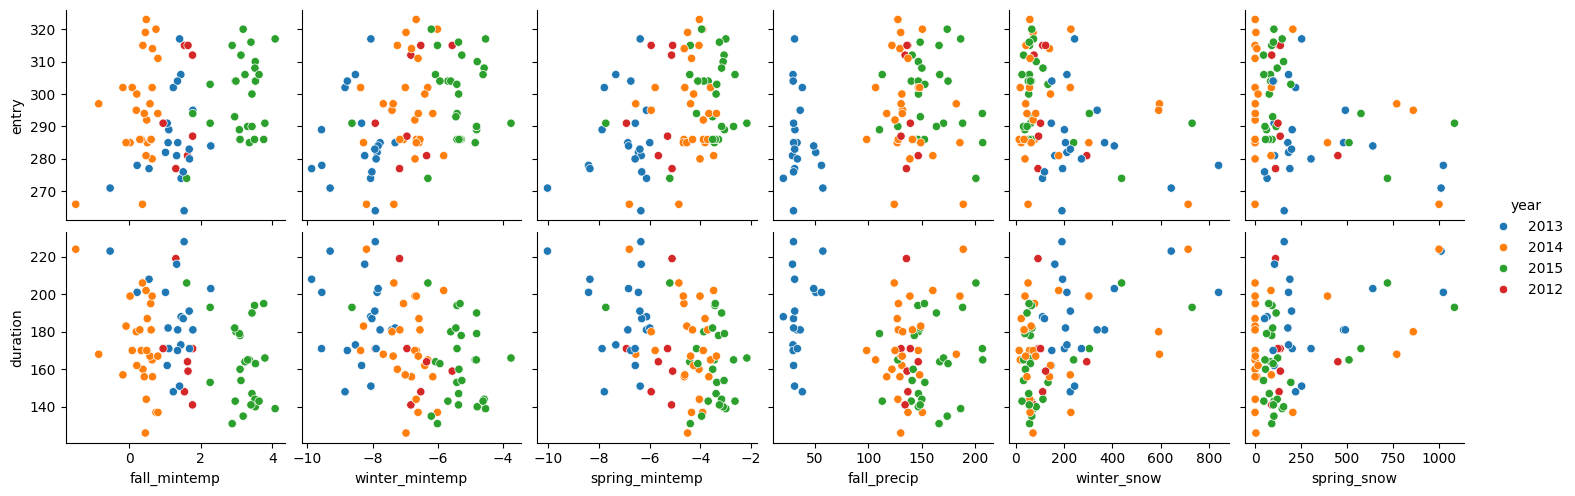

In [51]:
#visualize  entry and duration with variables
sns_plot = sns.pairplot(data=df_clean,
             x_vars=['fall_mintemp','winter_mintemp','spring_mintemp','fall_precip','winter_snow','spring_snow'],
             y_vars=['entry','duration'],
             kind='scatter', hue='year')

sns_plot.savefig('blackbear_temp-precip_pairplot.png')

In [52]:
#create field for average minimum temp and precipitation
df_clean['average_mintemp'] = (df_clean['fall_mintemp'] + df_clean['winter_mintemp'] + df_clean['spring_mintemp']) / 3
df_clean['average_precip'] = (df_clean['fall_precip'] + df_clean['winter_snow'] + df_clean['spring_snow'])/3
df_clean

<ipython-input-52-899664d626da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['average_mintemp'] = (df_clean['fall_mintemp'] + df_clean['winter_mintemp'] + df_clean['spring_mintemp']) / 3
<ipython-input-52-899664d626da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['average_precip'] = (df_clean['fall_precip'] + df_clean['winter_snow'] + df_clean['spring_snow'])/3


,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,spring_mintemp,fall_precip,winter_snow,spring_snow,percent_urban,natural_food,elevation,year,average_mintemp,average_precip
0,B125_2013,B125,264.0,228.0,126.0,17,156.254296,barren,1.536440,-7.920372,-6.340974,30.301152,190.875000,158.347826,46.833199,6.637359,2281.120117,2013,-4.241635,126.507993
1,B125_2014,B125,285.0,187.0,107.0,18,140.193720,barren,0.506958,-6.582209,-3.814811,127.132526,21.797101,0.000000,27.993601,18.512523,2149.020020,2014,-3.296687,49.643209
3,B126_2015,B126,315.0,131.0,81.0,4,64.057448,barren,2.879919,-6.014587,-4.395311,166.147622,56.702899,90.804348,14.354700,18.577468,2393.649902,2015,-2.509993,104.551623
5,B128_2013,B128,282.0,201.0,117.0,7,NaN,barren,1.016436,-7.863387,-6.438754,51.058362,211.455882,182.217391,2.606900,5.430743,2488.800049,2013,-4.428568,148.243879
6,B128_2014,B128,286.0,195.0,116.0,8,88.725008,barren,0.603796,-7.055041,-4.645870,128.206246,77.260870,1.086957,0.017699,25.098659,2483.320068,2014,-3.699038,68.851357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,B313_2014,B313,311.0,137.0,83.0,14,85.376272,yearlings,0.806188,-6.609633,-4.345476,137.156850,58.702899,0.000000,23.078501,15.811865,2375.320068,2014,-3.382974,65.286583
120,B393_2015,B393,306.0,143.0,84.0,15,95.086560,yearlings,3.630685,-4.617094,-2.634485,113.136465,25.275362,47.804348,13.272100,13.886434,2199.239990,2015,-1.206965,62.072059
122,B47_2013,B47,304.0,170.0,108.0,7,83.113744,yearlings,1.352063,-8.776822,-6.735741,30.008086,148.764706,98.130435,8.211420,11.092715,2237.290039,2013,-4.720167,92.301075
126,B50_2013,B50,280.0,171.0,85.0,12,NaN,yearlings,1.687521,-7.894938,-6.567567,33.923437,271.750000,304.391304,8.517380,5.773077,2502.010010,2013,-4.258328,203.354914


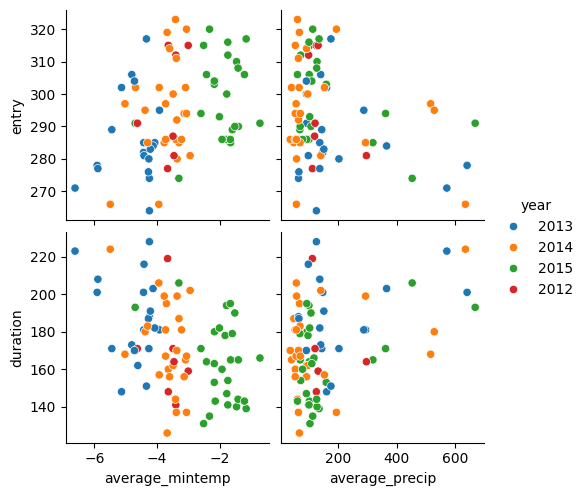

In [53]:
#visualized durations and entries with averages
sns_averages_plot = sns.pairplot(data=df_clean,
             x_vars=['average_mintemp', 'average_precip'],
             y_vars=['entry','duration'],
             kind='scatter', hue='year')

sns_averages_plot.savefig('blackbear_average_temp-precip_pairplot.png')

In [54]:
df_2012 = df_clean[(df_clean['year'] == '2012')]
df_2013 = df_clean[(df_clean['year'] == '2013')]
df_2014 = df_clean[(df_clean['year'] == '2014')]
df_2015 = df_clean[(df_clean['year'] == '2015')]

In [55]:
#determine whether temp and precipitation was statistically significant between years
average_mintemp_2012 = df_2012['average_mintemp']
average_mintemp_2013 = df_2013['average_mintemp']
average_mintemp_2014 = df_2014['average_mintemp']
average_mintemp_2015 = df_2015['average_mintemp']
average_precip_2012 = df_2012['average_precip']
average_precip_2013 = df_2013['average_precip']
average_precip_2014 = df_2014['average_precip']
average_precip_2015 = df_2015['average_precip']

f_entry_statistic, entry_p_value = f_oneway(average_mintemp_2012, average_mintemp_2013, average_mintemp_2014, average_mintemp_2015)
print('average_mintemp f-stat', f_entry_statistic, 'average_mintemp p-value', entry_p_value)

f_entry_statistic, entry_p_value = f_oneway(average_precip_2012, average_precip_2013, average_precip_2014, average_precip_2015)
print('average_precip f-stat', f_entry_statistic, 'average_precip p-value', entry_p_value)

average_mintemp f-stat 65.17813904938589 average_mintemp p-value 4.421810200055262e-21
average_precip f-stat 0.8728308101200671 average_precip p-value 0.45897497789705743


In [56]:
X = df_clean[['average_mintemp']]
y_entry = df_clean['entry']
y_dur = df_clean['duration']

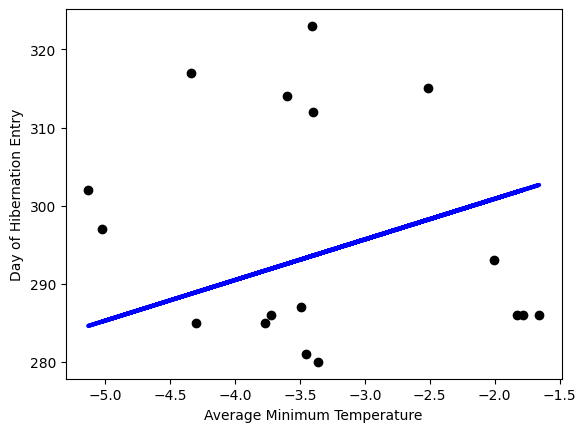

In [57]:
#make a linear regression of entry and average temperatures
X_train, X_test, y_entry_train, y_entry_test = train_test_split(X, y_entry, test_size=0.2, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_entry_train)
y_entry_pred = linreg.predict(X_test)

plt.scatter(X_test, y_entry_test, color="black")
plt.plot(X_test, y_entry_pred, color="blue", linewidth=3)
plt.xlabel('Average Minimum Temperature')
plt.ylabel('Day of Hibernation Entry')

plt.savefig('entry_linreg.png')

In [58]:
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

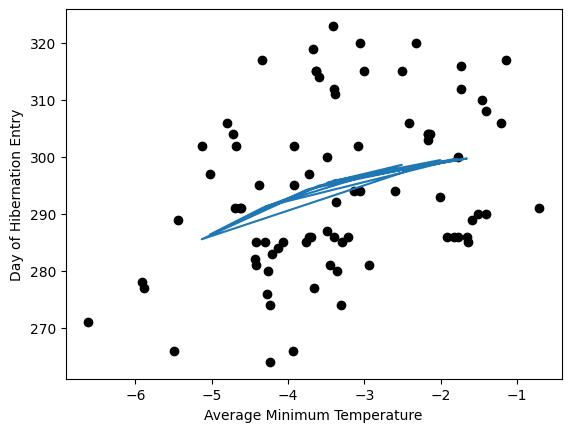

In [59]:
#use GridSearchCV to determine the best regression
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree' : np.arange(21)}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y_entry);
grid.best_params_

model = grid.best_estimator_

plt.scatter(X, y_entry, color='black')
lim = plt.axis()
y_entry_test = model.fit(X, y_entry).predict(X_test)
plt.plot(X_test, y_entry_test);
plt.axis(lim);
plt.xlabel('Average Minimum Temperature')
plt.ylabel('Day of Hibernation Entry')

grid.best_params_
plt.savefig('entry_gridsearchcv.png')

In [60]:
#check r^2 and RMSE for the regression
entry_model = PolynomialRegression(degree=2)
entry_model.fit(X_train, y_entry_train)
y_entry_model_pred = entry_model.predict(X_test)

r2 = metrics.r2_score(y_entry_test, y_entry_model_pred)
print(f'r^2: {r2}')
rmse = metrics.root_mean_squared_error(y_entry_test, y_entry_model_pred)
print(f"RMSE: {rmse}")

r^2: 0.9010985093779489
RMSE: 1.3107053513057638


Text(0, 0.5, 'Hibernation Duration')

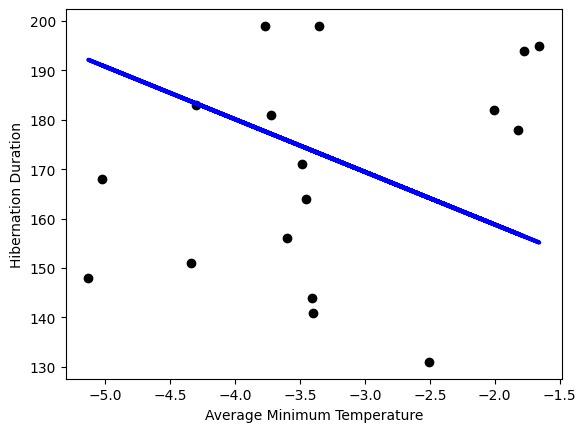

In [61]:
#linear regression of duration and average temps
X_train, X_test, y_dur_train, y_dur_test = train_test_split(X, y_dur, test_size=0.2, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_dur_train)
y_dur_pred = linreg.predict(X_test)

plt.scatter(X_test, y_dur_test, color="black")
plt.plot(X_test, y_dur_pred, color="blue", linewidth=3)
plt.xlabel('Average Minimum Temperature')
plt.ylabel('Hibernation Duration')

{'polynomialfeatures__degree': np.int64(2)}

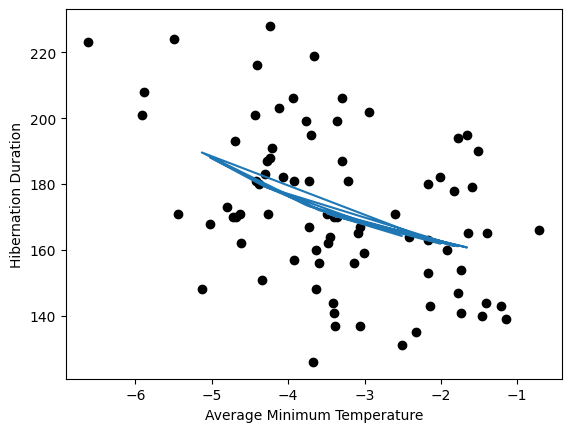

In [62]:
#GridSearchCV to determine best degree for regression
param_grid = {'polynomialfeatures__degree' : np.arange(21)}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y_dur);
grid.best_params_

model = grid.best_estimator_

plt.scatter(X, y_dur, color='black')
lim = plt.axis()
y_dur_test = model.fit(X, y_dur).predict(X_test)
plt.plot(X_test, y_dur_test);
plt.axis(lim);
plt.xlabel('Average Minimum Temperature')
plt.ylabel('Hibernation Duration')

grid.best_params_

In [63]:
#check R2 and RMSE
dur_model = PolynomialRegression(degree=2)
dur_model.fit(X_train, y_dur_train)
y_dur_model_pred = dur_model.predict(X_test)

r2 = metrics.r2_score(y_dur_test, y_dur_model_pred)
print(f'r^2: {r2}')
rmse = metrics.root_mean_squared_error(y_dur_test, y_dur_model_pred)
print(f"RMSE: {rmse}")

r^2: 0.9004979451721806
RMSE: 2.6656920480308126


Split entry and duration into classes to predict the classes

In [64]:
df_clean['entry_qurt'] = pd.qcut((df_clean['entry']), 4, labels = [1, 2, 3, 4]).astype(float)
df_clean['dur_qurt'] = pd.qcut((df_clean['duration']), 4, labels = [1, 2, 3, 4]).astype(float)
df_clean

<ipython-input-64-7f1d9011dc1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['entry_qurt'] = pd.qcut((df_clean['entry']), 4, labels = [1, 2, 3, 4]).astype(float)
<ipython-input-64-7f1d9011dc1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dur_qurt'] = pd.qcut((df_clean['duration']), 4, labels = [1, 2, 3, 4]).astype(float)


,den_id,bear_id,entry,duration,exit,age,mass,offspring,fall_mintemp,winter_mintemp,...,winter_snow,spring_snow,percent_urban,natural_food,elevation,year,average_mintemp,average_precip,entry_qurt,dur_qurt
0,B125_2013,B125,264.0,228.0,126.0,17,156.254296,barren,1.536440,-7.920372,...,190.875000,158.347826,46.833199,6.637359,2281.120117,2013,-4.241635,126.507993,1.0,4.0
1,B125_2014,B125,285.0,187.0,107.0,18,140.193720,barren,0.506958,-6.582209,...,21.797101,0.000000,27.993601,18.512523,2149.020020,2014,-3.296687,49.643209,1.0,3.0
3,B126_2015,B126,315.0,131.0,81.0,4,64.057448,barren,2.879919,-6.014587,...,56.702899,90.804348,14.354700,18.577468,2393.649902,2015,-2.509993,104.551623,4.0,1.0
5,B128_2013,B128,282.0,201.0,117.0,7,NaN,barren,1.016436,-7.863387,...,211.455882,182.217391,2.606900,5.430743,2488.800049,2013,-4.428568,148.243879,1.0,4.0
6,B128_2014,B128,286.0,195.0,116.0,8,88.725008,barren,0.603796,-7.055041,...,77.260870,1.086957,0.017699,25.098659,2483.320068,2014,-3.699038,68.851357,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,B313_2014,B313,311.0,137.0,83.0,14,85.376272,yearlings,0.806188,-6.609633,...,58.702899,0.000000,23.078501,15.811865,2375.320068,2014,-3.382974,65.286583,4.0,1.0
120,B393_2015,B393,306.0,143.0,84.0,15,95.086560,yearlings,3.630685,-4.617094,...,25.275362,47.804348,13.272100,13.886434,2199.239990,2015,-1.206965,62.072059,4.0,1.0
122,B47_2013,B47,304.0,170.0,108.0,7,83.113744,yearlings,1.352063,-8.776822,...,148.764706,98.130435,8.211420,11.092715,2237.290039,2013,-4.720167,92.301075,3.0,2.0
126,B50_2013,B50,280.0,171.0,85.0,12,NaN,yearlings,1.687521,-7.894938,...,271.750000,304.391304,8.517380,5.773077,2502.010010,2013,-4.258328,203.354914,1.0,3.0


Decision Tree and Random Forests

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Entry Quartiles

In [66]:
X = df_clean[['fall_mintemp', 'winter_mintemp', 'spring_mintemp', 'average_mintemp']]
y_entry_quartile = df_clean['entry_qurt']

X_train, X_test, y_eqrt_train, y_eqrt_test = train_test_split(X, y_entry_quartile, test_size=0.2, random_state=1)

treemodel = DecisionTreeRegressor(max_depth=5)
treemodel = treemodel.fit(X_train, y_eqrt_train)

ypred_eqrt_train = treemodel.predict(X_train)
ypred_eqrt_test = treemodel.predict(X_test)

print(tree.export_text(treemodel))

|--- feature_3 <= -3.65
|   |--- feature_3 <= -4.52
|   |   |--- feature_3 <= -5.47
|   |   |   |--- value: [1.00]
|   |   |--- feature_3 >  -5.47
|   |   |   |--- feature_3 <= -4.71
|   |   |   |   |--- feature_0 <= 1.40
|   |   |   |   |   |--- value: [2.75]
|   |   |   |   |--- feature_0 >  1.40
|   |   |   |   |   |--- value: [4.00]
|   |   |   |--- feature_3 >  -4.71
|   |   |   |   |--- value: [2.00]
|   |--- feature_3 >  -4.52
|   |   |--- feature_3 <= -3.93
|   |   |   |--- feature_1 <= -8.04
|   |   |   |   |--- feature_1 <= -8.06
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_1 >  -8.06
|   |   |   |   |   |--- value: [4.00]
|   |   |   |--- feature_1 >  -8.04
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_3 >  -3.93
|   |   |   |--- feature_2 <= -4.63
|   |   |   |   |--- feature_3 <= -3.84
|   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- feature_3 >  -3.84
|   |   |   |   |   |--- value: [1.33]
|   |   |   |--- feature_2 >  -4.63
|  

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

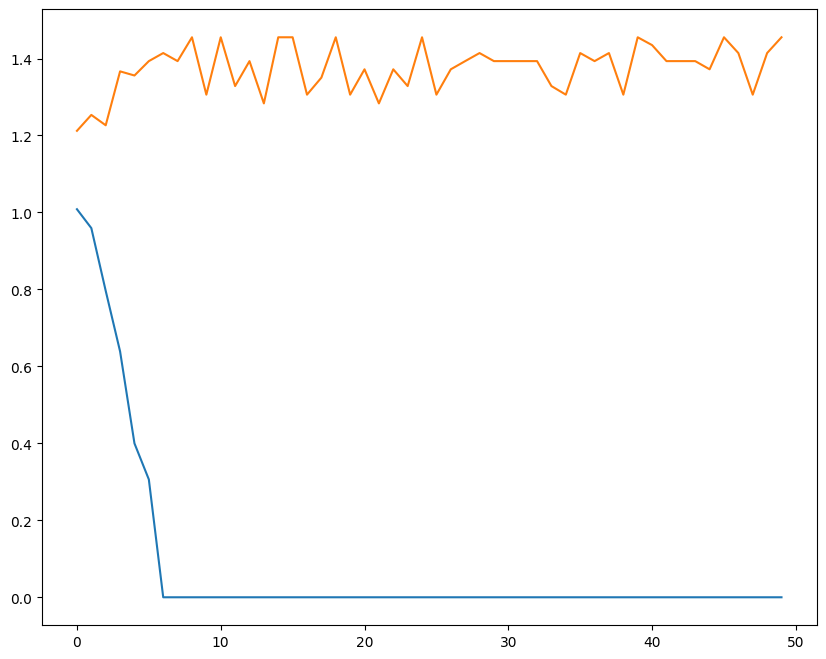

In [67]:
train_err = np.zeros(50)
test_err = np.zeros(50)

for i in range(0,50):
  treemodel = DecisionTreeRegressor(max_depth = i+1)
  treemodel.fit(X_train, y_eqrt_train)
  ypred_eqrt_train = treemodel.predict(X_train)
  ypred_eqrt_test = treemodel.predict(X_test)
  train_err[i] = np.sqrt(np.mean((y_eqrt_train-ypred_eqrt_train)**2))
  test_err[i] = np.sqrt(np.mean((y_eqrt_test-ypred_eqrt_test)**2))

fig = plt.figure(figsize=(10,8))

plt.plot(train_err, label='train')
plt.plot(test_err, label='test')
plt.legend

In [68]:
print('accuracy', metrics.accuracy_score(y_eqrt_test, ypred_eqrt_test))
print('precision',metrics.precision_score(y_eqrt_test, ypred_eqrt_test, average='weighted'))
print("recall:",metrics.recall_score(y_eqrt_test, ypred_eqrt_test, average='weighted'))
print('F1 score', metrics.f1_score(y_eqrt_test, ypred_eqrt_test, average='weighted'))

accuracy 0.35294117647058826
precision 0.39705882352941174
recall: 0.35294117647058826
F1 score 0.3529411764705882


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

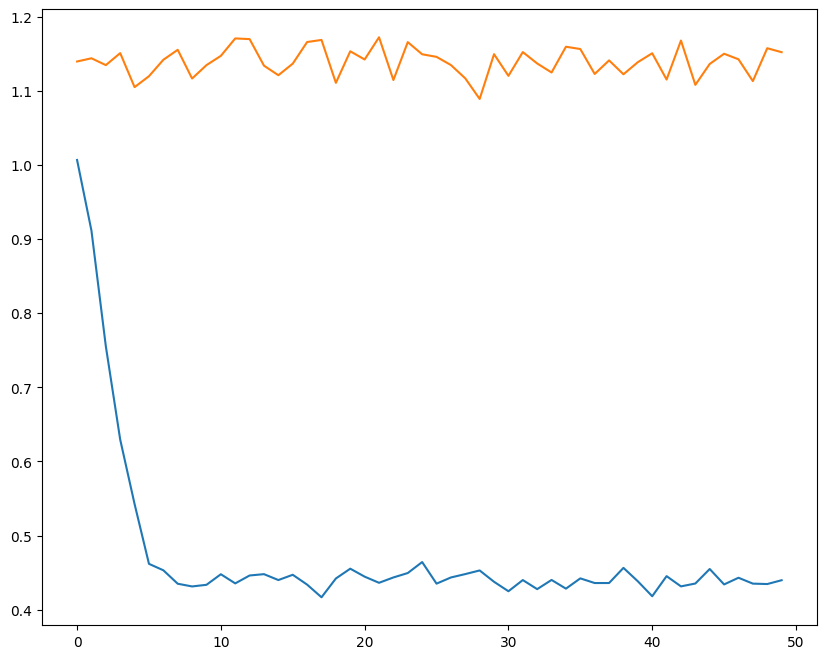

In [69]:
train_err = np.zeros(50)
test_err = np.zeros(50)

for i in range(0,50):
  forest = RandomForestRegressor(100, max_depth = i+1)
  forest.fit(X_train, y_eqrt_train)
  ypred_eqrt_train_ft = forest.predict(X_train)
  ypred_eqrt_test_ft = forest.predict(X_test)
  train_err[i] = np.sqrt(np.mean((y_eqrt_train-ypred_eqrt_train_ft)**2))
  test_err[i] = np.sqrt(np.mean((y_eqrt_test-ypred_eqrt_test_ft)**2))

fig = plt.figure(figsize=(10,8))
plt.plot(train_err, label='train')
plt.plot(test_err, label='test')
plt.legend